<a href="https://colab.research.google.com/github/brunompacheco/computer-vision/blob/main/exercises/02-bmp-similarity-metrics-segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Similarity metrics for segmentation

In [1]:
%matplotlib inline

import cv2
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio

from pathlib import Path

from scipy.spatial.distance import cdist

In [2]:
!wget http://www.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/BSR/BSR_bsds500.tgz

--2021-11-10 15:07:07--  http://www.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/BSR/BSR_bsds500.tgz
Resolving www.eecs.berkeley.edu (www.eecs.berkeley.edu)... 23.185.0.1, 2620:12a:8001::1, 2620:12a:8000::1
Connecting to www.eecs.berkeley.edu (www.eecs.berkeley.edu)|23.185.0.1|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/BSR/BSR_bsds500.tgz [following]
--2021-11-10 15:07:07--  https://www.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/BSR/BSR_bsds500.tgz
Connecting to www.eecs.berkeley.edu (www.eecs.berkeley.edu)|23.185.0.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/BSR/BSR_bsds500.tgz [following]
--2021-11-10 15:07:07--  https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/BSR/BSR_bsds500.tgz
Resolving www2.eecs.berkeley.edu (ww

In [3]:
!tar -xzf BSR_bsds500.tgz

## Input image

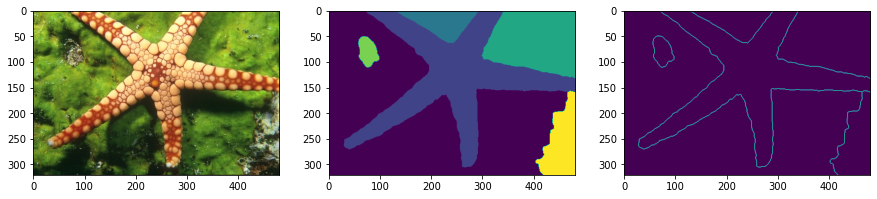

In [3]:
img_fpath = next(Path('./BSR').glob('**/12003.jpg'))
gt_fpath = next(Path('./BSR').glob('**/12003.mat'))

# Load the image in color (OpenCV standard = BGR)
image = cv2.imread(str(img_fpath), cv2.IMREAD_COLOR)
# Convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

gt = sio.loadmat(gt_fpath)['groundTruth']

fig, axs = plt.subplots(1,3, figsize=(15,5))

axs[0].imshow(image)

axs[1].imshow(gt[0,0]['Segmentation'][0,0])
axs[2].imshow(gt[0,0]['Boundaries'][0,0])

fig.show()

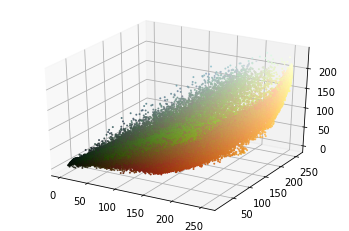

In [4]:
img_pixels = image.reshape(-1, *image.shape[-1:])

ax = plt.axes(projection='3d')
ax.scatter3D(img_pixels.T[0], img_pixels.T[1], img_pixels.T[2], c=img_pixels/255.0, s=1)
plt.show()

## Define sampled pixels

I use a square as it is much simpler than implementing a drawing on the image.

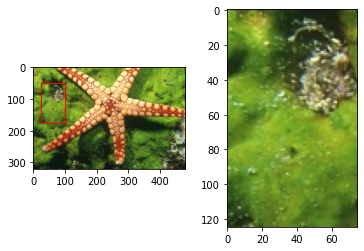

In [5]:
from matplotlib import patches

bbox = [(25,50), (100,175)]
sample = image[bbox[0][1]:bbox[1][1],bbox[0][0]:bbox[1][0]]

ax = plt.subplot(121)

ax.imshow(image)

# Create a Rectangle patch
rect = patches.Rectangle(bbox[0], bbox[1][0]-bbox[0][0], bbox[1][1]-bbox[0][1], linewidth=1, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

ax = plt.subplot(122)
ax.imshow(sample)

plt.show()

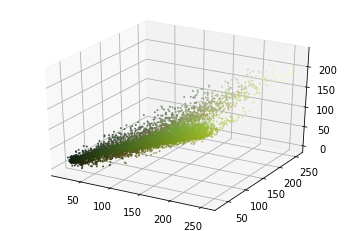

In [6]:
smp_pixels = sample.reshape(-1, *sample.shape[-1:])

ax = plt.axes(projection='3d')
ax.scatter3D(smp_pixels.T[0], smp_pixels.T[1], smp_pixels.T[2], c=smp_pixels/255.0, s=1)
plt.show()

## Compute distances from sampled pixels

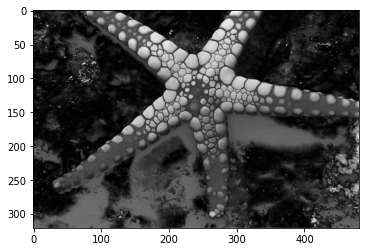

In [38]:
def dist_mask(image, sample, metric='euclidean', **kwargs):
    img_pixels = image.reshape(-1, *image.shape[-1:])
    smp_pixels = sample.reshape(-1, *sample.shape[-1:])

    # cdist(smp_pixels, smp_pixels, metric=metric, **kwargs)

    dist_mat = cdist(img_pixels, smp_pixels, metric=metric, **kwargs)

    return dist_mat.sum(axis=-1).reshape(image.shape[:-1])

threshold = np.percentile(dists, q=95)

plt.imshow(dist_mask(image, sample), cmap='gray')
plt.show()

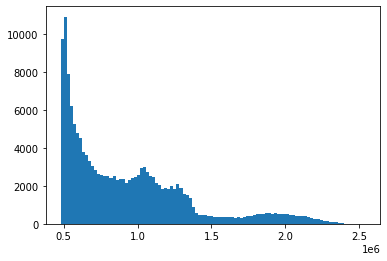

In [27]:
plt.hist(dist_mask(image, sample).flatten(), bins=100)
plt.show()

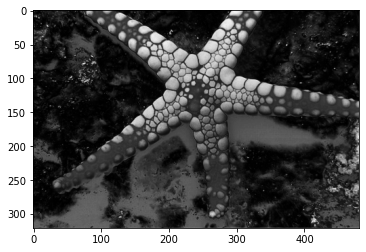

In [36]:
plt.imshow(dist_mask(image, sample, metric='minkowski', p=1), cmap='gray')
plt.show()

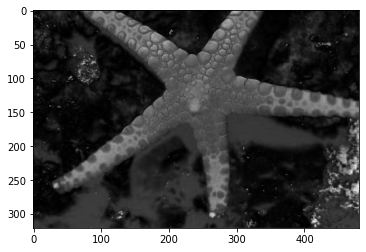

In [37]:
plt.imshow(dist_mask(image, sample, metric='mahalanobis'), cmap='gray')
plt.show()